In [3]:
# Assignment 1  - Melbourne Housing Dataset
# Practice Loading in Data  (20 Points)

## Add Your Name Here
# Enya Liu



In [4]:
import pandas as pd
melbourne_data = pd.read_csv('melb_data.csv')

melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Q1 - How many unique suburbs are there? (2 points)

In [21]:
suburbs = melbourne_data['Suburb'].unique()
len(suburbs)

314

## Q2 - How many unique properties are there? (2 points)

In [22]:
property = melbourne_data['Propertycount'].unique()
len(property)

311

## Q3- What is the mean price of a property in the Kensington suburb? (2 points)

In [7]:
import numpy as np
kensington_property = melbourne_data[['Suburb','Price']]
kensington = kensington_property[kensington_property['Suburb']=='Kensington']
np.average(kensington['Price'])

831667.4358974359

## Q4 - What percentage of properties contain a YearBuilt value? (2 points)

In [8]:
yearbuilt_value = melbourne_data[melbourne_data['YearBuilt'] > 0]
percentage_value = len(yearbuilt_value)/len(melbourne_data)
print(percentage_value)

0.6041973490427098


## Q5 - Plot the Landsize as a histogram using 20 bins. (2 points)
Describe the shape of your histogram plot and your interpretations in one paragraph. 

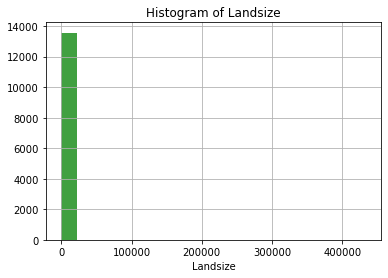

In [12]:
import matplotlib.pyplot as plt
# calculate mu and sigma
landsize_value = melbourne_data['Landsize']
# mu=np.mean(landsize_value)
# sigma=np.std(landsize_value)
# generate
# x= mu + sigma*np.random.randn(10000)

#graph it
plt.hist(landsize_value,20,density=False,facecolor='g',alpha=0.75)
plt.xlabel('Landsize')
plt.title('Histogram of Landsize')
plt.grid(True)
plt.show()

## Q6 -  Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value. (2 points)

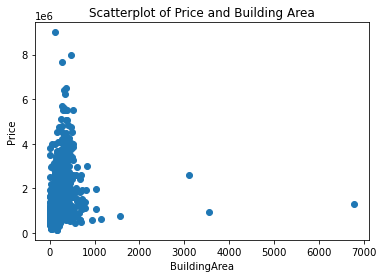

In [16]:
area_price = melbourne_data[['Price','BuildingArea']]
valid_area_price = area_price[(area_price['BuildingArea']>0) & (area_price['BuildingArea']<40000)]
x1=valid_area_price['BuildingArea']
y1 = valid_area_price['Price']
# plot without an outlier
plt.scatter(x1,y1)
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('Scatterplot of Price and Building Area')
plt.show()

## Q7 - List the top 10 SellerG, and what percentage of properties they have listed.  (2 points) 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

In [17]:
Propertycount_total=melbourne_data.Propertycount.sum()
df7=melbourne_data.pivot_table(index='SellerG',values='Propertycount',aggfunc={'Propertycount':'sum'}).reset_index()

df7['percentage']=df7.Propertycount/Propertycount_total*100

df7['percentage']=df7.percentage.apply(lambda x:str(round(x,6))+'%')

top10_percentage=df7.sort_values(by='Propertycount',ascending=False).reset_index(drop=True).iloc[:10,[0,2]]
top10_percentage

,SellerG,percentage
0,Nelson,11.566509%
1,Jellis,10.321094%
2,hockingstuart,9.726656%
3,Barry,7.421871%
4,Ray,6.063908%
5,Marshall,5.084539%
6,Buxton,4.180274%
7,Biggin,3.18363%
8,Brad,2.160657%
9,Woodards,2.046384%


## Q8 - Fix a problem. (2 points)
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire dataset.  Add one room to the Rooms column using two methods:

 - Using a for python loop, and
 - Using a single statement (Pandas)
 
 Show your output dataset

In [9]:
#1、Using a for python loop
for i in range(len(melbourne_data)):
    melbourne_data.loc[i,'Rooms']=melbourne_data.loc[i,'Rooms']+1

#2、Using a single statement (Pandas)
melbourne_data['Rooms']=melbourne_data['Rooms']+1

## Q9 - What is the Address of the earliest built house in the data set? (2 points)

In [26]:
# used listed date instead of YearBuilt
# melbourne_data.Date=melbourne_data.Date.apply(pd.to_datetime)
# eraly_date=melbourne_data.sort_values(by='Date').iloc[0,7]
# Address_earliest=melbourne_data[melbourne_data.Date==eraly_date].iloc[:,1]

# use YearBuilt to redo the problem
print(melbourne_data['YearBuilt'].nsmallest(1))

9968    1196.0
Name: YearBuilt, dtype: float64


## Q10 - Save a file  (2 points)
The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the counsil person.  Export the file with only the allowed columns, and do not write and index column.

In [20]:
melbourne_suburb = melbourne_data[melbourne_data['Suburb']=='Melbourne']
melbourne_suburb[['Suburb','Price','Date']].to_excel('Export_resoult.xlsx',index=False)